In [369]:
#combine files 
import glob 
import os
#clean 
import string
import pandas as pd
import numpy as np
import emoji
import nltk
import re 
from cleantext import clean
#sleep timer 
import time 
import logging
import threading
#show most common words
from collections import Counter
#word cloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [370]:
df = pd.read_csv('ninjavan_thailand.csv')
#only keep caption column 
df1 = df[['caption']]
df1 = df1.dropna()

In [371]:
df1['middle'] = df1['caption'].str.split(")").str[1] 
df1['reviews'] = df1['middle'].str.split("(").str[0]

df1 = df1.reset_index()

In [372]:
df1['reviews'].fillna('0', inplace = True)
for i, row in df1.iterrows(): 
    review = row['reviews']
    if review == '0':
        df1['reviews'][i] = review.replace('0', row['caption'])

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_37881/1854476216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reviews'][i] = review.replace('0', row['caption'])


In [373]:
df1 = df1.rename(columns={'reviews': 'Ninjavan TH Reviews'})
df1

,index,caption,middle,Ninjavan TH Reviews
0,0,(Translated by Google) Thank you very much (Original) ขอบคุณมากคับ,Thank you very much (Original,Thank you very much
1,2,Always wrong delivery!!! How do you even train your staff? How could you even deliver wrong address every time????? Please train your worker!!!!!!!!,NaN,Always wrong delivery!!! How do you even train your staff? How could you even deliver wrong address every time????? Please train your worker!!!!!!!!
2,3,(Translated by Google) The delivery man is very bad. It's the worst transport. (Original) …,The delivery man is very bad. It's the worst transport. (Original,The delivery man is very bad. It's the worst transport.
3,4,(Translated by Google) Please call the recipient and send it to the recipient's hand. …,Please call the recipient and send it to the recipient's hand. …,Please call the recipient and send it to the recipient's hand. …
4,5,"(Translated by Google) I don't know what other people's are, but mine, 1 day, received items. Very fast delivery. …","I don't know what other people's are, but mine, 1 day, received items. Very fast delivery. …","I don't know what other people's are, but mine, 1 day, received items. Very fast delivery. …"
...,...,...,...,...
494,922,"(Translated by Google) Terrible staff Delivery of the front of the house No need to wait for the item to be picked up. Despite running out to pick up immediately after hearing the buzzer (less than 10 seconds), despite seeing that I came …",Terrible staff Delivery of the front of the house No need to wait for the item to be picked up. Despite running out to pick up immediately after hearing the buzzer (less than 10 seconds,Terrible staff Delivery of the front of the house No need to wait for the item to be picked up. Despite running out to pick up immediately after hearing the buzzer
495,923,(Translated by Google) Wait until the product has been designated date .. Until now it has not come to pass .. The transport staff have never called. …,Wait until the product has been designated date .. Until now it has not come to pass .. The transport staff have never called. …,Wait until the product has been designated date .. Until now it has not come to pass .. The transport staff have never called. …
496,925,(Translated by Google) Good. Fast delivery. Staff speak politely. (Original) …,Good. Fast delivery. Staff speak politely. (Original,Good. Fast delivery. Staff speak politely.
497,928,(Translated by Google) Fast delivery and knowing the route. Reliable. (Original) …,Fast delivery and knowing the route. Reliable. (Original,Fast delivery and knowing the route. Reliable.


In [374]:
df1['Ninjavan TH Reviews'].to_csv('ninjavanth1.csv')

### Run 2nd csv

In [184]:
df2 = pd.read_csv('ninjaxpress_batam.csv')

In [186]:
df2 = df2[['caption']]

df2 = df2.dropna()

df2['middle'] = df2['caption'].str.split(")").str[1]

df2['reviews'] = df2['middle'].str.split("(").str[0]

In [190]:
df2 = df2.reset_index()

df2['reviews'].fillna('0', inplace = True)
for i, row in df2.iterrows(): 
    review = row['reviews']

    if review == '0':
        df2['reviews'][i] = review.replace('0', row['caption'])

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_37881/3903897083.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['reviews'][i] = review.replace('0', row['caption'])


In [191]:
df2 = df2.rename(columns={'reviews': 'Ninjavan TH Reviews'})
df2['Ninjavan TH Reviews'].to_csv('ninjavanth2.csv')

,index,caption,middle,Ninjavan TH Reviews
0,0,"PENGIRIMAN TERBURUK, PAKET DIBAWA KABUR KURIR,...",NaN,"PENGIRIMAN TERBURUK, PAKET DIBAWA KABUR KURIR,..."
1,1,Saya berkomentar disini karena smua kurir dan ...,NaN,Saya berkomentar disini karena smua kurir dan ...
2,3,(Translated by Google) CS call center on behal...,CS call center on behalf of Novi and Agung is...,CS call center on behalf of Novi and Agung is...
3,4,(Translated by Google) It's outrageous that th...,It's outrageous that the ninja company's cour...,It's outrageous that the ninja company's cour...
4,6,"(Translated by Google) Good morning, I apologi...","Good morning, I apologize in advance that I h...","Good morning, I apologize in advance that I h..."
...,...,...,...,...
722,917,(Translated by Google) the communication agent...,the communication agent is good and the respo...,the communication agent is good and the respo...
723,922,(Translated by Google) Fast delivery. As fast ...,Fast delivery. As fast as a ninja ... (Original,Fast delivery. As fast as a ninja ...
724,927,"(Translated by Google) Thank you, my order nin...","Thank you, my order ninja van arrived (Original","Thank you, my order ninja van arrived"
725,928,(Translated by Google) NinjaExspres is very th...,NinjaExspres is very thankful ... NinjaExpres...,NinjaExspres is very thankful ... NinjaExpres...


### Combining files together 

In [195]:
files = os.path.join("ninjavanth*.csv")
files = glob.glob(files)
df_combi = pd.concat(map(pd.read_csv, files), ignore_index=True)
df_combi.to_csv("combined_ninjavanth.csv")

### Clean the data

In [375]:
df_combi = pd.read_csv('ninjavanth1.csv')

from nltk.corpus import stopwords
stop = stopwords.words('english')

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation, remove words containing numbers and lemmatize/stem.'''
    text = str(text).lower()
    text = re.sub('#\w*', '', text)
    text = re.sub('@\w*', '', text)    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = clean(text, no_emoji=True)
    text = emoji.demojize(text, delimiters=("", "")) #change emoji into text 
    text = ' '.join([word for word in text.split() if word not in (stop)])
    return text

# Let's take a look at the updated text
df_combi['clean_1'] = pd.DataFrame(df_combi['Ninjavan TH Reviews'].apply(clean_text_round1))
df_combi

,Unnamed: 0,Ninjavan TH Reviews,clean_1
0,0,Thank you very much,thank much
1,1,Always wrong delivery!!! How do you even train your staff? How could you even deliver wrong address every time????? Please train your worker!!!!!!!!,always wrong delivery even train staff could even deliver wrong address every time please train worker
2,2,The delivery man is very bad. It's the worst transport.,delivery man bad worst transport
3,3,Please call the recipient and send it to the recipient's hand. …,please call recipient send recipients hand ...
4,4,"I don't know what other people's are, but mine, 1 day, received items. Very fast delivery. …",dont know peoples mine day received items fast delivery ...
...,...,...,...
494,494,Terrible staff Delivery of the front of the house No need to wait for the item to be picked up. Despite running out to pick up immediately after hearing the buzzer,terrible staff delivery front house need wait item picked despite running pick immediately hearing buzzer
495,495,Wait until the product has been designated date .. Until now it has not come to pass .. The transport staff have never called. …,wait product designated date come pass transport staff never called ...
496,496,Good. Fast delivery. Staff speak politely.,good fast delivery staff speak politely
497,497,Fast delivery and knowing the route. Reliable.,fast delivery knowing route reliable


### Sentiment analysis 


In [376]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def clean_text_round2(text):
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output
df_combi['clean_2'] = pd.DataFrame(df_combi['clean_1'].apply(clean_text_round2))


In [377]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    if sentiment_dict['compound'] >= 0.05 : 
       return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "Negative"
    else : 
       return "Neutral"
        
df_combi['sentiment'] = pd.DataFrame(df_combi['Ninjavan TH Reviews'].apply(sentiment_scores))

In [378]:
df_combi

,Unnamed: 0,Ninjavan TH Reviews,clean_1,clean_2,sentiment
0,0,Thank you very much,thank much,thank much,Positive
1,1,Always wrong delivery!!! How do you even train your staff? How could you even deliver wrong address every time????? Please train your worker!!!!!!!!,always wrong delivery even train staff could even deliver wrong address every time please train worker,always wrong delivery even train staff could even deliver wrong address every time please train worker,Negative
2,2,The delivery man is very bad. It's the worst transport.,delivery man bad worst transport,delivery man bad worst transport,Negative
3,3,Please call the recipient and send it to the recipient's hand. …,please call recipient send recipients hand ...,please call recipient send recipient hand ...,Positive
4,4,"I don't know what other people's are, but mine, 1 day, received items. Very fast delivery. …",dont know peoples mine day received items fast delivery ...,dont know people mine day received item fast delivery ...,Neutral
...,...,...,...,...,...
494,494,Terrible staff Delivery of the front of the house No need to wait for the item to be picked up. Despite running out to pick up immediately after hearing the buzzer,terrible staff delivery front house need wait item picked despite running pick immediately hearing buzzer,terrible staff delivery front house need wait item picked despite running pick immediately hearing buzzer,Negative
495,495,Wait until the product has been designated date .. Until now it has not come to pass .. The transport staff have never called. …,wait product designated date come pass transport staff never called ...,wait product designated date come pas transport staff never called ...,Neutral
496,496,Good. Fast delivery. Staff speak politely.,good fast delivery staff speak politely,good fast delivery staff speak politely,Positive
497,497,Fast delivery and knowing the route. Reliable.,fast delivery knowing route reliable,fast delivery knowing route reliable,Neutral


In [379]:
df_neg = df_combi.drop(df_combi[df_combi['sentiment'] != 'Negative'].index)
df_neg = df_neg[['clean_2']]
df_neg

,clean_2
1,always wrong delivery even train staff could even deliver wrong address every time please train worker
2,delivery man bad worst transport
6,first app said shipping call center ask tell warehouse called say send today minute passed say send failed allow ...
10,worst company dealt delay delivery difficulty communicating support
11,item another sellerjust wrong postcodebut delivered toninjai bounced back ...
...,...
439,suck cant deliver front room baan ua house floor didnt come said every company never raised argue didnt rise everyone ...
444,thailand bigger singapore country owner therefore unable access demand thai people order product shopee wait week already got number yet got status status folded sent ...
451,im sick
471,slow delivery take convenience postpone delivery date time appointment appointment u one oclock afternoon come send u five oclock ...


In [381]:
#combining the text into one long string for word cloud 
cloud_string = df_neg['clean_2'].str.cat(sep=' ')

In [382]:
# Let's first pull out the top 30 words for each category
words = []
for word in cloud_string.split():
        words.append(word)
Counter(words).most_common()

[('...', 104),
 ('delivery', 60),
 ('bad', 48),
 ('call', 36),
 ('day', 36),
 ('time', 31),
 ('item', 29),
 ('delivered', 25),
 ('service', 25),
 ('good', 25),
 ('slow', 22),
 ('tell', 19),
 ('contact', 19),
 ('deliver', 17),
 ('send', 16),
 ('company', 16),
 ('customer', 16),
 ('one', 16),
 ('cant', 16),
 ('staff', 14),
 ('didnt', 14),
 ('dont', 14),
 ('system', 14),
 ('even', 13),
 ('recipient', 13),
 ('waiting', 13),
 ('come', 13),
 ('wait', 13),
 ('yet', 13),
 ('worst', 12),
 ('transport', 12),
 ('say', 12),
 ('number', 12),
 ('received', 12),
 ('product', 12),
 ('u', 11),
 ('status', 11),
 ('parcel', 11),
 ('contacted', 11),
 ('ordered', 11),
 ('said', 10),
 ('back', 10),
 ('order', 10),
 ('sent', 10),
 ('pick', 10),
 ('address', 9),
 ('called', 9),
 ('arrived', 9),
 ('still', 9),
 ('ninja', 9),
 ('unable', 9),
 ('calling', 9),
 ('house', 9),
 ('terrible', 9),
 ('wrong', 8),
 ('ask', 8),
 ('today', 8),
 ('shop', 8),
 ('poor', 8),
 ('havent', 8),
 ('van', 8),
 ('package', 8),
 ('fi

In [383]:
#add meaningless words to stopwords
add_stop_words = ['...' , 'package', 'even', 'use','call','one','though', 'didnt', 'dont', 'hasnt', 'c',]
stop_words = add_stop_words + stop 

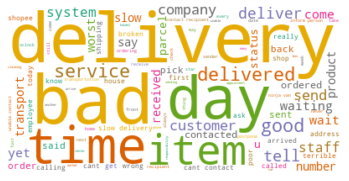

In [384]:
#wordcloud for top 100 words 
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42, max_words = 100)

wordcloud = wc.generate(cloud_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

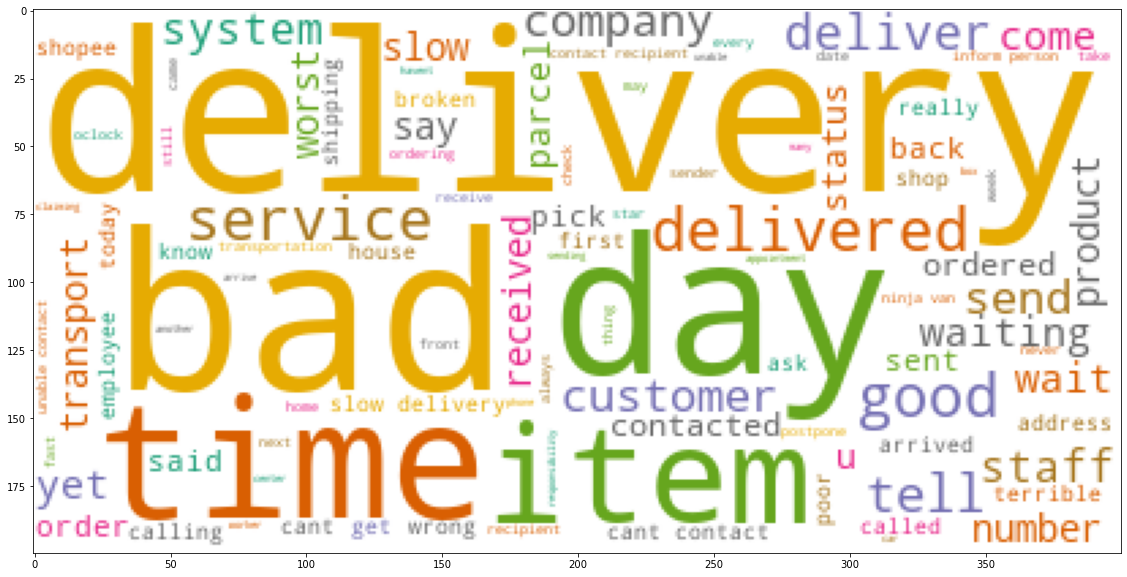

In [385]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)

In [386]:
late_words = ['slow', 'late', 'long']
df_late = df_neg[df_neg['clean_2'].str.contains('|'.join(late_words))]
df_late = df_late.rename(columns ={'clean_2':'Late reviews'})

In [387]:
df_late.to_csv('Late_reviews_ninjath.csv')